# Laboratório #2

### ATENCÃO

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá plotar a superfície de erro e encontrar a solução ótima para o problema da regressão linear utilizando a equação normal.

Dada a seguinte **função observável**

$$y_{noisy}(n) = y(n) + w(n),$$

onde $w$ é vetor coluna com $N = 1000$ (ou seja, o número de exemplos) valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 1 e $y$ é a **função objetivo**. Neste exercício, a **função objetivo** (ou **modelo gerador**) é dada por:

$$y(n) = x_1(n) + x_2(n),  $$

onde $x_1$ é um vetor coluna com $N$ valores retirados de uma distribuição aleatória uniformemente distribuída no intervalo de $0$ a $1$ e $x_2$ é outro vetor coluna com $N$ valores retirados de uma distribuição aleatória uniformemente distribuída no intervalo de $0$ a $100$.

A **função hipótese** para este exercício deve ser

$$h(n) = a_1 x_1(n) + a_2 x_2(n).$$

**OBSERVAÇÕES**:

+ A biblioteca `numpy` fornece uma função chamada `rand` para geração de valores aleatórios retirados de uma distribuição uniforme. Seu uso é idêntico ao da função `randn`.

De posse destas informações, faça o seguinte:

1. Plote a **função observável**, $y_{noisy}$, em função dos atributos $x_1$ e $x_2$. Note que este será um gráfico 3D.

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


<IPython.core.display.Javascript object>


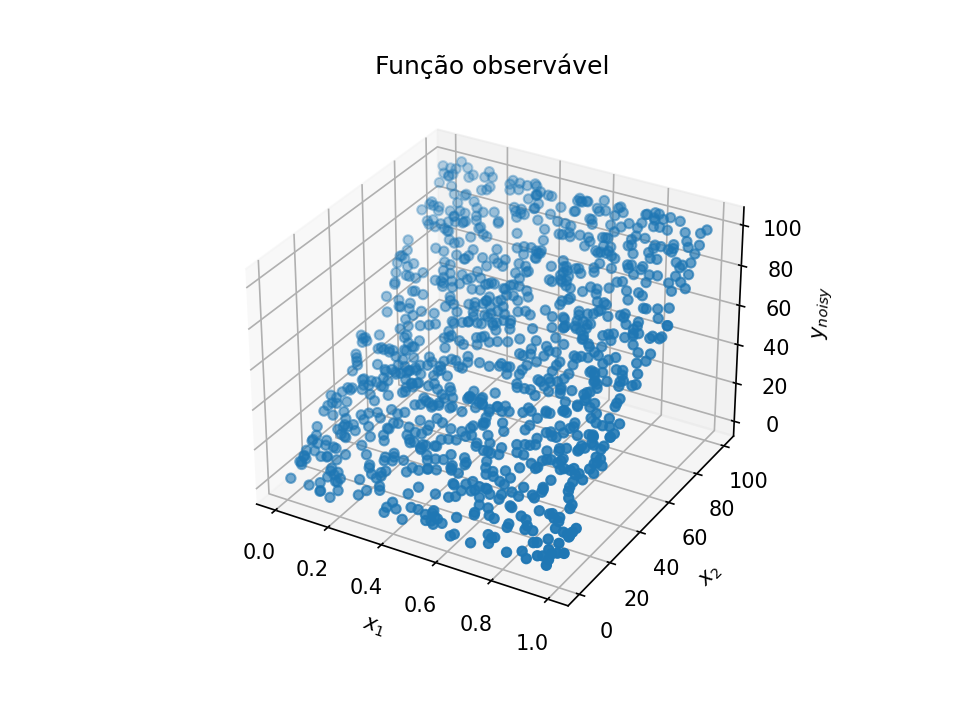

In [1]:
# Digite aqui o código do exercício.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# para figuras interativas usar 'notebook' ao inves de 'inline'
%matplotlib notebook

# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(10119)

# Number of examples.
N = 1000

x1 = np.random.rand(N,1)
x2 = 100*np.random.rand(N,1)
w = np.random.randn(N,1)

# Função objetivo.
y = x1 + x2

# Função observável (ruidosa)
y_noisy = y + w

# Plot cost-function surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x1,x2,y_noisy)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y_{noisy}$')
plt.title('Função observável')
plt.show()

2. Plote a superfície de erro. Note que este será um gráfico 3D.

**Dica**: Para plotar a superfície de erro, faça $a_1$ variar de $-4$ até $6$ e $a_2$ variar de $-4$ até $6$.

<IPython.core.display.Javascript object>


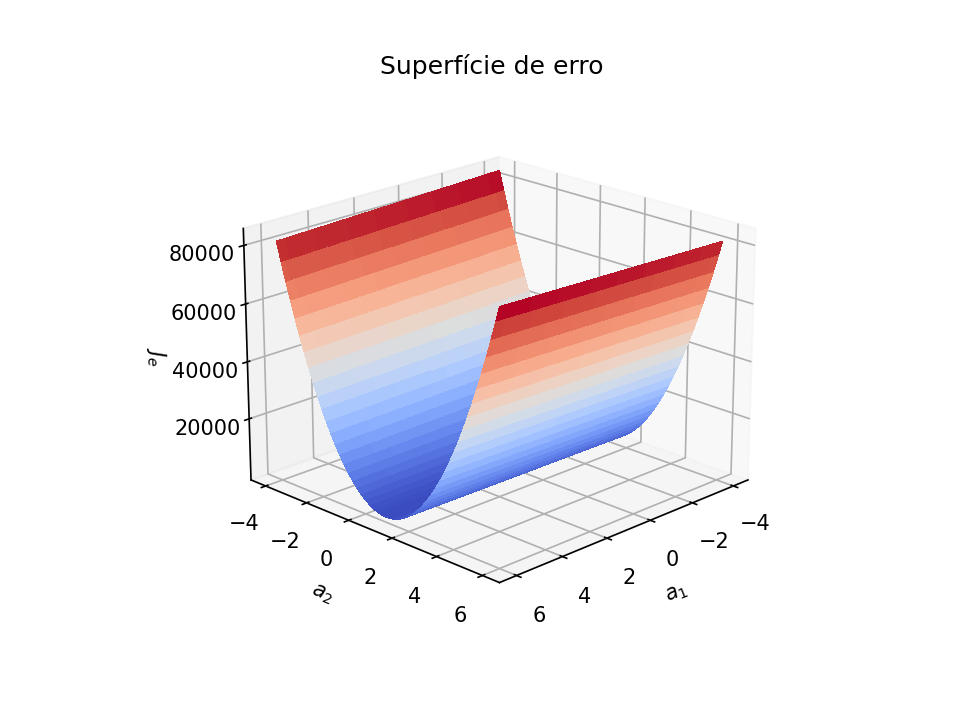

In [2]:
# Digite aqui o código do exercício.

def calculateErrorSurface(y, x1, x2):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-4.0, 6.0, N)
    a2 = np.linspace(-4.0, 6.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y - yhat));            
            
    return J, A1, A2


J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');
plt.title('Superfície de erro')
ax.view_init(20, 45)
#Show the plot.
plt.show()

3. Encontre a solução ótima para este problema de regressão linear utilizando a **equação normal**. Imprima os valores encontrados para os **pesos**, $a_1$ e $a_2$, e o valor do **erro quadrátio médio** com a solução ótima.

In [3]:
# Digite aqui o código do exercício.

X = np.c_[x1,x2]

# Solução ótima com a equação normal.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

print('a0:', a_opt[0,0])
print('a1:', a_opt[1,0])

yhat = X.dot(a_opt)
Je_optimum = (1/N)*np.sum(np.power((y_noisy - yhat), 2))

print('MSE:', Je_optimum)

a0: 1.015549402214333
a1: 1.0000168361923882
MSE: 0.9898673044858725


4. Plote a **superfície de contorno** indicando a solução ótima encontrada no item anterior.

<IPython.core.display.Javascript object>


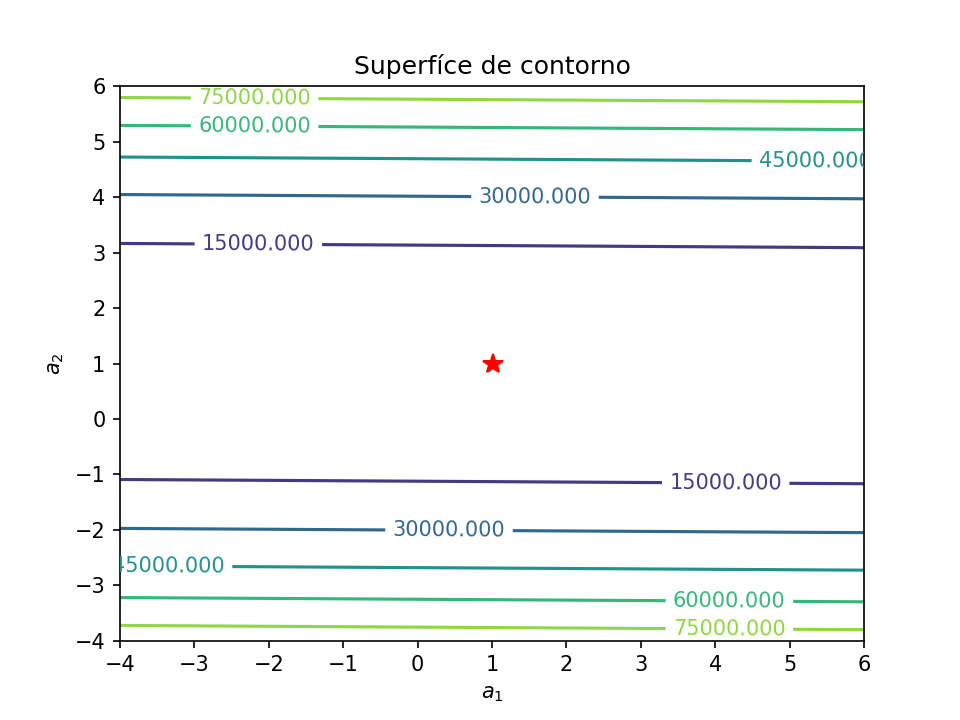

In [4]:
# Digite aqui o código do exercício.

fig = plt.figure()

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Superfíce de contorno')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=10)

plt.xticks(np.arange(-4, 7, step=1.0))
plt.yticks(np.arange(-4, 7, step=1.0))

plt.show()

5. Compare a superfície de contorno acima com a mostrada no exemplo #2 dos slides. Qual a diferença entre as duas superfícies? Você consegue explicar o motivo desta diferença?

Escreva aqui sua resposta.

As duas superfícies de contorno são diferentes. As linhas da superfície de contorno do exemplo #2 são circulares, indicando que a variação dos pesos influencia de forma igual no erro quadrático médio. 

Porém, a superfície de contorno acima tem linhas de contorno praticamente paralelas ao eixo do peso $a_1$. Isso indica que a variação do peso $a_2$ faz com que o erro quadrático médio varie mais rapidamente do que o peso $a_1$. Isto se deve ao fato da escala de $x_2$ ser $100$ vezes maior do que a escala de $x_1$.

6. Plote a **função observável**, $y_{noisy}$, em função dos atributos $x_1$ e $x_2$ juntamente com o **hiperplano** encontrado com a **equação normal**. Note que este será um gráfico 3D. 

<IPython.core.display.Javascript object>


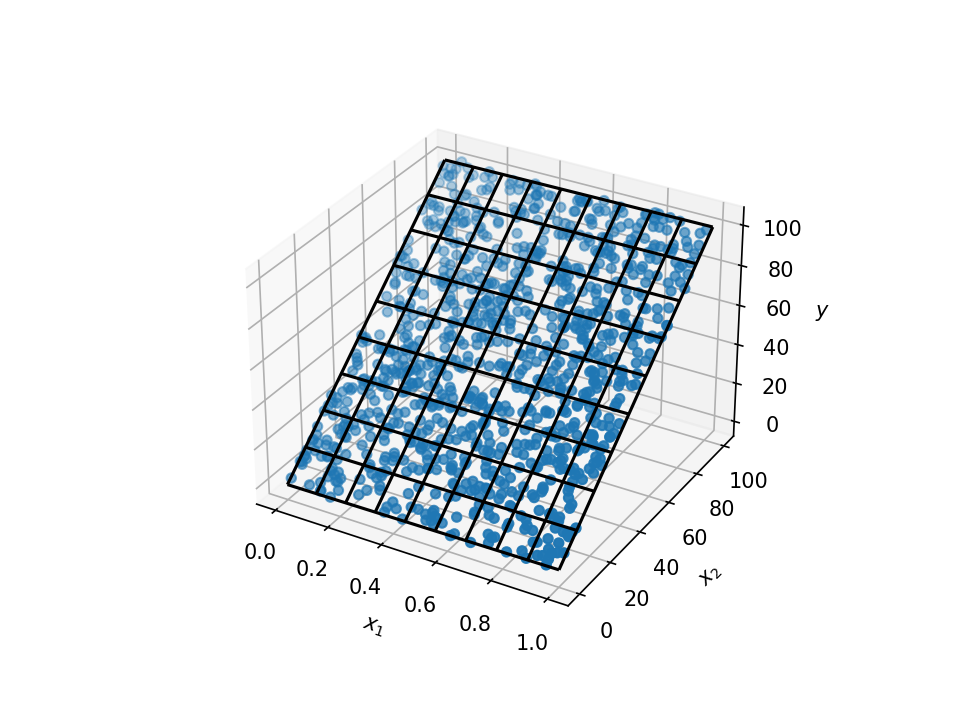

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

M = 10
x1_ = np.linspace(0.0, 1.0, M)
x2_ = np.linspace(0.0, 100.0, M)
X1, X2 = np.meshgrid(x1_, x2_)
Y = a_opt[0]*X1 + a_opt[1]*X2

ax.scatter(x1,x2,y_noisy)
ax.plot_wireframe(X1, X2, Y, color="black")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.show()

7. O que aconteceria com o erro quadrático médio caso o ruído adicionado à função objetivo tivesse uma variância igual a $0.1$ ao invés de $1$? Imprima o valor do erro após essa mudança. Repita na célula abaixo apenas a parte do código que for necessária para se gerar o vetor de ruído com a nova variância.

Houve diferença no erro obtido com este novo vetor de ruído? O que você pode concluir com base nesse resultado?

In [6]:
# Digite aqui o código do exercício.

w = np.sqrt(0.1)*np.random.randn(N,1)

# Função observável (ruidosa)
y_noisy = y + w

# Solução ótima com a equação normal.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)
Je_optimum = (1/N)*np.sum(np.power((y_noisy - yhat), 2))

print('MSE:', Je_optimum)

MSE: 0.10391903760362353
